In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_array=cv2.imread("train_dataset\closed_eyes\s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

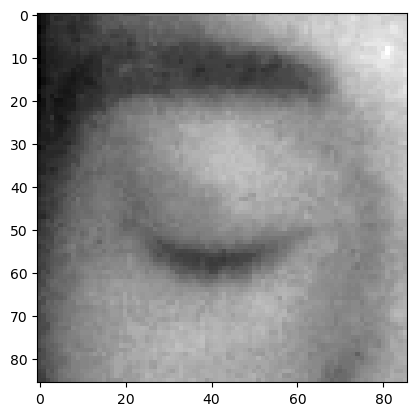

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

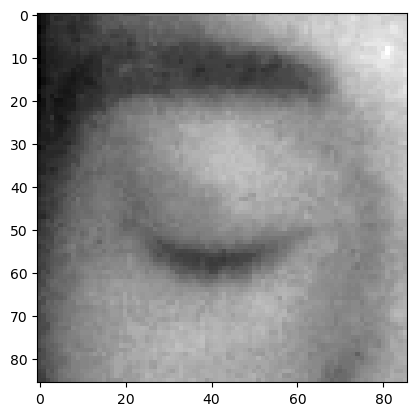

In [5]:
Datadirectory="train_dataset/"
Classes=["closed_eyes","open_eyes"]
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


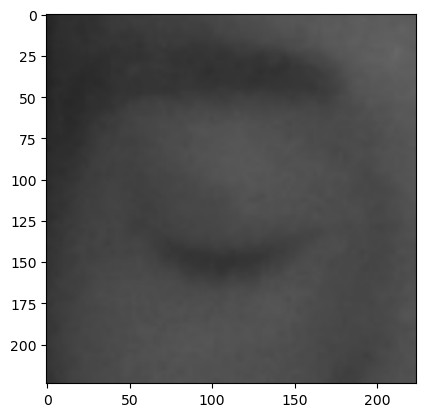

In [6]:
img_size=224

g_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(g_array,cmap="gray")
plt.show()

### for data and labels ,reading all images and converting them into an array


In [7]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                g_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([g_array,class_num])
            except Exception as e :
                pass
   
    

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

1208


In [10]:
import random 

random.shuffle(training_Data)

In [11]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,img_size, img_size, 3)

In [12]:
X.shape

(1208, 224, 224, 3)

### normalizing the data

In [13]:
X=X/225.0

In [14]:
Y=np.array(y)

In [15]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

### creating model for training

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model =tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [20]:
base_input = model.layers[1].input


In [21]:
base_output =  model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)



In [23]:
g_model=keras.Model(inputs = base_input,outputs = final_output)

In [24]:
g_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

### binary classification

In [25]:
g_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
g_model.fit(X,Y,epochs=1,validation_split=0.1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9324 - loss: 0.1763 - val_accuracy: 0.8678 - val_loss: 0.4346


In [27]:
g_model.save('my_model.keras',include_optimizer=False)

In [28]:
g_model=tf.keras.models.load_model('my_model.keras')

In [29]:
g_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
img_array=cv2.imread('train_dataset\open_eyes\s0001_01891_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
g_array=cv2.resize(backtorgb,(img_size,img_size))

In [31]:
X_input=np.array(g_array).reshape(1,img_size,img_size,3)

In [32]:
X_input.shape

(1, 224, 224, 3)

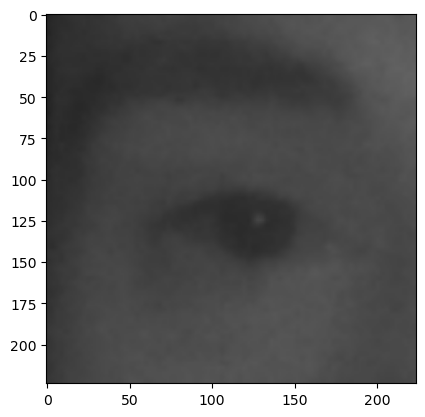

In [33]:
plt.imshow(g_array)

In [34]:
X_input=X_input/255.0

In [35]:
prediction=g_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [36]:
prediction

array([[0.23075688]], dtype=float32)

In [37]:
img=cv2.imread('smiling_face.jpg')

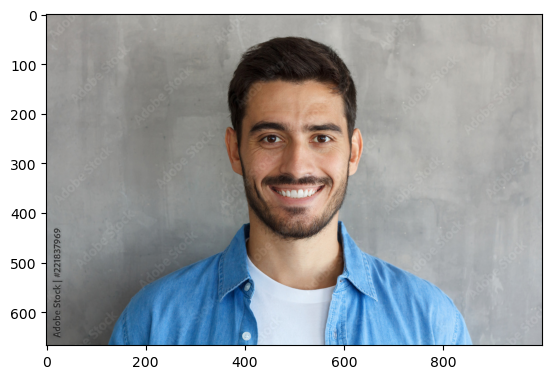

In [38]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
       

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [42]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [43]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    

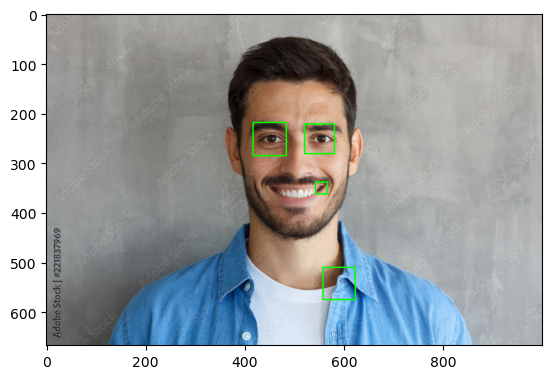

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#### cropping eyes


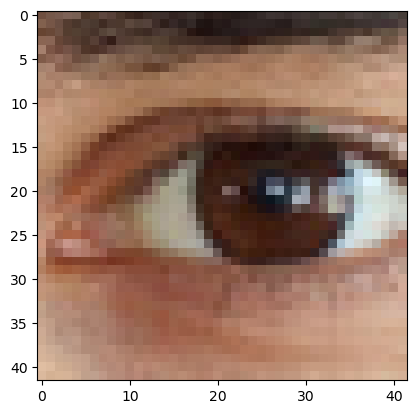

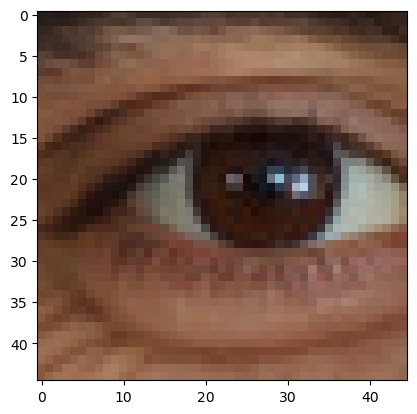

No eyes detected within the ROI.
No eyes detected within the ROI.


In [45]:
import cv2
import matplotlib.pyplot as plt

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('smiling_face.jpg')

if img is None:
    print("Error: Image not loaded properly.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    if len(eyes) == 0:
        print('No eyes detected.')
    else:
        for (x, y, w, h) in eyes:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyess = eye_cascade.detectMultiScale(roi_gray)
            if len(eyess) == 0:
                print('No eyes detected within the ROI.')
            else:
                for (ex, ey, ew, eh) in eyess:
                    eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

                    if eyes_roi.size == 0:
                        print('eyes_roi is empty.')
                    else:
                        eyes_roi_rgb = cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB)
                        plt.imshow(eyes_roi_rgb)
                        plt.show()


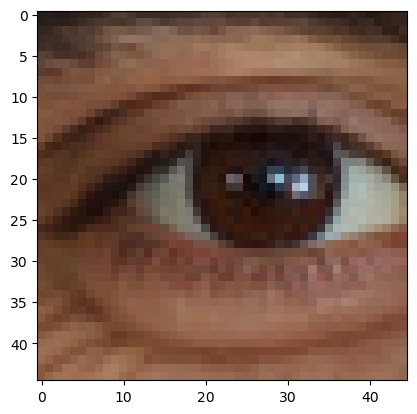

In [48]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

### detection

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python 
#from deepface import DeepFace
import cv2
path='haarcascade_frontalface_default.xml'
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')

while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h,in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print('eyes are not detected')
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey: ey+eh, ex: ex +ew]
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image= np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0

    Predictions = g_model.predict(final_image)
    if (Predictions>0.2):
        status ='Open Eyes'
    else:
        status ='Closed Eyes'

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX


    cv2.putText(frame,
                 status,
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection System',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
      
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms

### eyes are closed for 'some' time

In [47]:
import windsound
frequency = 2500
duration = 1000
import numpy as np
import cv2

path = 'haarcascade_frontalface_default.xml'
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
counter=0

while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h,in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey: ey+eh, ex: ex +ew]
                
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
       cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX

    final_image=cv2.resize(eyes_roi,(224,224))
    final_image= np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0

    Predictions = g_model.predict(final_image)
    if (Predictions>0.2):
        status ='Open Eyes'
        cv2.putText(frame,
                   status,
                   (150,150),
                   font, 3,
                   (0,255,0),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75

        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
               
        cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    else:
        counter+=1
        status='Closed Eyes'
        cv2.putText(frame,
                    status,
                    (150,150),
                    font, 3,
                    (0,0,255),
                    2,
                    cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter>5:
              x1,y1,w1,h1 = 0,0,175,75
              cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
              cv2.putText(frame,'Sleep Alert!! ' ,(x1+int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLX,0.7,(0,0,255),2)
              windsound.Beep(frequency,duration)
              counter=0
              
        

ModuleNotFoundError: No module named 'windsound'